# Cognifiz Restaurannt Data Analysis (Level-02)

* Task 01 (Restaurant Ratings)
    * Analyze the distribution of aggregate ratings and determine the most common rating range.
    * Calculate the average number of votes received by restaurants.


* Task 02 (Cuisine Combination)
    * Identify the most common combinations of cuisines in the dataset.
    * Determine if certain cuisine combinations tend to have higher ratings.

* Task 03 (Geographic Analysis)
    * Plot the locations of restaurants on a map using longitude and latitude coordinates.
    * Identify any patterns or clusters of restaurants in specific areas.

* Task 04 (Restaurant Chains)
    * Identify if there are any restaurant chains present in the dataset.
    * Analyze the ratings and popularity of different restaurant chains.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Dataset .csv' , lineterminator = '\n')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
# Create rating bins
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

# Count how many fall into each range
rating_distribution = df['Rating Range'].value_counts().sort_index()

# Print the most common range
most_common_range = rating_distribution.idxmax()
print(rating_distribution)
print(f"Most common rating range: {most_common_range}")

Rating Range
0-1    2148
1-2      10
2-3    1891
3-4    4388
4-5    1114
Name: count, dtype: int64
Most common rating range: 3-4


In [14]:
print(f"{df['Votes'].describe()['mean']:.2f}")

156.91


In [18]:
# Clean and normalize the 'Cuisines' column
df['Cuisines'] = df['Cuisines'].astype(str).str.strip()

# Remove NaN and duplicates
df_cuisine_combos = df['Cuisines'].dropna().value_counts()

# Display top 10 most common cuisine combinations
print("Top 10 most common cuisine combinations:")
print(df_cuisine_combos.head(10))


Top 10 most common cuisine combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [20]:
# Ensure proper data types
df['Cuisines'] = df['Cuisines'].astype(str).str.strip()
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Drop rows with missing values in either column
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])

# Group by exact cuisine combination
rating_by_cuisine_combo = (
    df.groupby('Cuisines')['Aggregate rating']
    .agg(['count', 'mean'])
    .sort_values(by='mean', ascending=False)
)

# Filter combinations with at least a few reviews (e.g., 20)
rating_by_cuisine_combo_filtered = rating_by_cuisine_combo[rating_by_cuisine_combo['count'] >= 20]

# Display top 10 highest rated combinations
print("Top 10 highest-rated cuisine combinations:")
print(rating_by_cuisine_combo_filtered.head(20))


Top 10 highest-rated cuisine combinations:
                                          count      mean
Cuisines                                                 
American                                     31  3.667742
Italian                                      54  3.657407
Italian, Pizza                               24  3.637500
Mexican                                      36  3.636111
Continental                                  21  3.566667
Fast Food, Burger                            56  3.403571
Cafe, Tea                                    20  3.375000
Bakery, Desserts, Fast Food                  63  3.366667
American, Fast Food                          20  3.350000
Chinese, Thai                                51  3.309804
Desserts, Ice Cream                          26  3.296154
North Indian, Continental                    28  3.264286
Burger, Fast Food                            43  3.169767
Burger, Desserts, Fast Food                  22  3.136364
North Indian, Chinese, Contin

In [ ]:
# Drop rows with missing or invalid coordinates
df = df.dropna(subset=['Longitude', 'Latitude'])

# Create a base map centered on the average coordinates
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Use MarkerCluster for better performance with many points
marker_cluster = MarkerCluster().add_to(m)

# Add restaurant markers
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        tooltip=row['Cuisines']
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('restaurant_map.html')
print("Map saved as restaurant_map.html")


In [27]:
df = df.dropna(subset=['Latitude', 'Longitude'])

# Prepare coordinate data
coords = df[['Latitude', 'Longitude']].values

# Standardize coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=15).fit(coords_scaled)
df['Cluster'] = db.labels_  # -1 means noise

# Count how many clusters
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(f"Number of clusters found: {num_clusters}")

# Plot results on a folium map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'cadetblue', 'darkgreen']

for _, row in df.iterrows():
    color = 'gray' if row['Cluster'] == -1 else cluster_colors[row['Cluster'] % len(cluster_colors)]
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"Cluster: {row['Cluster']}, Restaurant: {row['Restaurant Name']}"
    ).add_to(m)

m.save('restaurant_clusters_map.html')
print("Clustered map saved as restaurant_clusters_map.html")


🔍 Number of clusters found: 18
✅ Clustered map saved as 'restaurant_clusters_map.html'


In [29]:
# Normalize restaurant names
df['Restaurant Name'] = df['Restaurant Name'].str.strip().str.lower()

# Count total entries for each restaurant name
chain_counts = (
    df.groupby('Restaurant Name')
    .agg(total_entries=('Restaurant ID', 'count'))
    .sort_values(by='total_entries', ascending=False)
)

# Filter for likely chains (appearing more than once)
likely_chains = chain_counts[chain_counts['total_entries'] > 1]

# Show top 10 likely chains
print("Top 10 likely restaurant chains (by number of entries):")
print(likely_chains.head(10))


Top 10 likely restaurant chains (by number of entries):
                  total_entries
Restaurant Name                
cafe coffee day              83
domino's pizza               79
subway                       63
green chick chop             51
mcdonald's                   48
keventers                    34
pizza hut                    30
giani                        29
baskin robbins               28
barbeque nation              26


In [40]:
# Normalize restaurant names
df['Restaurant Name'] = df['Restaurant Name'].str.strip().str.lower()

# Ensure ratings are numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Drop rows with missing ratings
df = df.dropna(subset=['Aggregate rating'])

# Group by restaurant name
chain_stats = (
    df.groupby('Restaurant Name')
    .agg(
        total_entries=('Restaurant ID', 'count'),
        avg_rating=('Aggregate rating', 'mean'),
        total_votes=('Votes', 'sum')
    )
    .sort_values(by='total_entries', ascending=False)
)

# Filter to likely chains (e.g., appear more than once)
likely_chains = chain_stats[chain_stats['total_entries'] > 1]

# Sort by total_votes instead of total_entries
top_chains = likely_chains.sort_values(by='total_votes', ascending=False).head(10)

# Show top 10 most popular chains with their average rating
print("Top 10 Most Popular Restaurant Chains:")
print(likely_chains.head(20))


Top 10 Most Popular Restaurant Chains:
                     total_entries  avg_rating  total_votes
Restaurant Name                                            
cafe coffee day                 83    2.419277         2428
domino's pizza                  79    2.740506         6643
subway                          63    2.907937         6124
green chick chop                51    2.672549          964
mcdonald's                      48    3.339583         5291
keventers                       34    2.870588         1263
pizza hut                       30    3.320000         4961
giani                           29    2.689655          854
baskin robbins                  28    1.860714          428
barbeque nation                 26    4.353846        28142
giani's                         22    2.781818         1150
barista                         22    3.072727          815
dunkin' donuts                  22    3.136364         5974
pind balluchi                   20    2.630000         5582
c

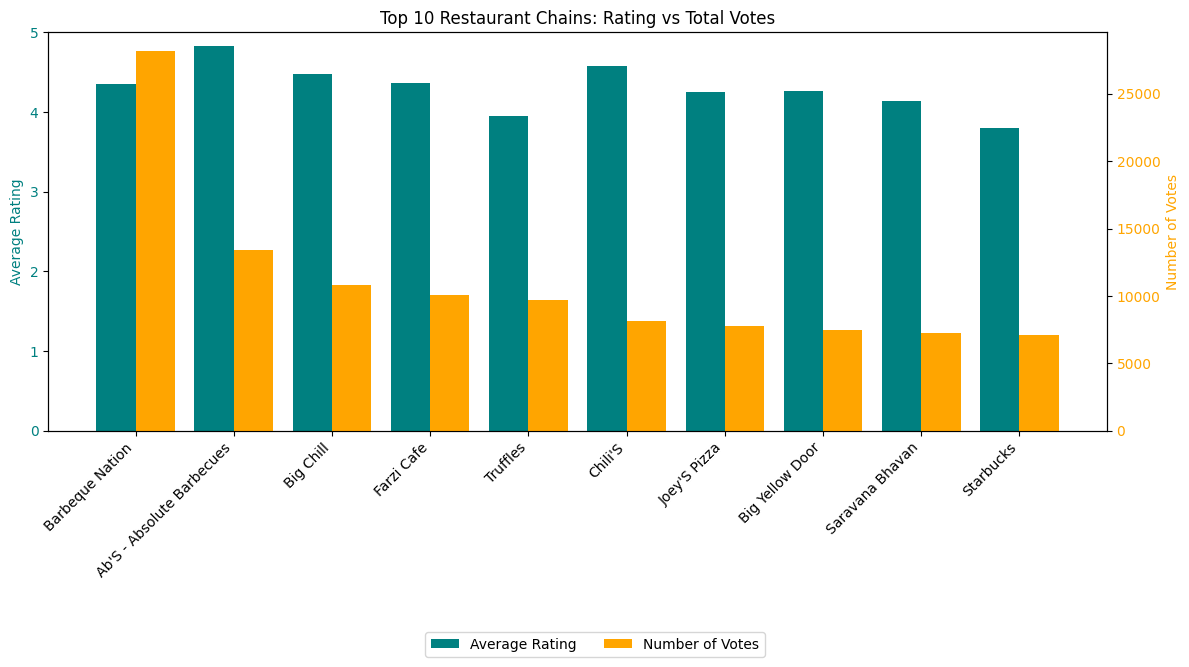

In [39]:
labels = top_chains.index.str.title()
x = np.arange(len(labels))
width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average rating on left y-axis
bars1 = ax1.bar(x - width/2, top_chains['avg_rating'], width, label='Average Rating', color='teal')
ax1.set_ylabel('Average Rating', color='teal')
ax1.set_ylim(0, 5)
ax1.tick_params(axis='y', labelcolor='teal')

# Plot total votes on right y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, top_chains['total_votes'], width, label='Number of Votes', color='orange')
ax2.set_ylabel('Number of Votes', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')

# Title
plt.title('Top 10 Restaurant Chains: Rating vs Total Votes')

# Combine legends properly
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout()
plt.show()
